## **Practical No: 5**

## **AIM:** Build a classification model on heart disease UCI dataset using ensemble techniques.

### **CODE and OUTPUT**

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
## Loading dataset
data1 = pd.read_csv('/content/heart.csv',skipinitialspace=True)
data1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
## Checking missing entries in the dataset columnwise
data1.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#Ensemble Methods
#Bagging and Random Forest
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [6]:
x=pd.DataFrame(data1.iloc[:,:-1]) 
y=pd.DataFrame(data1["target"])

In [7]:
#seed = 8
kfold = model_selection.KFold(n_splits = 3, random_state = None)
  
# initialize the base classifier
base_cls = DecisionTreeClassifier()
  
# no. of base classifier
num_trees = 500
  
# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = None)
  
results = model_selection.cross_val_score(model, x, y, cv = kfold)
print("accuracy :")
print(results.mean())

accuracy :
0.6567656765676567


In [8]:
#Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
#seed = 10
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,
                                               random_state=0) 
print(x_train.shape) 
print(x_test.shape) 
print(y_train.shape) 
print(y_test.shape) 
RFCModel=RandomForestClassifier(n_estimators=100) 
RFCModel.fit(x_train,y_train) 
y_pred2=RFCModel.predict(x_test) 
print(accuracy_score(y_test,y_pred2))

(242, 13)
(61, 13)
(242, 1)
(61, 1)
0.8688524590163934


In [10]:
from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.datasets import make_classification

#rng = np.random.RandomState(0)
#X, y = make_classification(n_samples=700, random_state=rng)

RFCModel2 = RandomForestClassifier(n_estimators=100, random_state=0)

param_dist = {
    "max_depth": [3, None],
    "max_features": randint(1, 13),
    "min_samples_split": randint(2, 13),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
}

rsh = HalvingRandomSearchCV(estimator=RFCModel2, param_distributions=param_dist, 
                            factor=2, random_state=0)
rsh.fit(x, y)
rsh.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 1,
 'min_samples_split': 2}

In [11]:
#BootStrap Method, Bootstrap Aggregation, Variable Importance

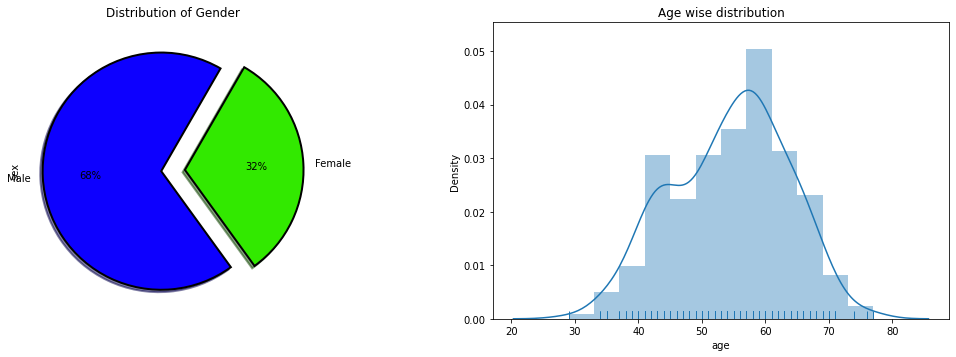

In [12]:
plt.figure(figsize=(18,12))
plt.subplot(221)
data1["sex"].value_counts().plot.pie(autopct = "%1.0f%%",
                colors = sns.color_palette("prism",5),
                startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(data1['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

## **Practical No: 6**

## **AIM:** Compare the ensemble model on heart disease data set and validate the same.

### **CODE and OUTPUT**

In [13]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA
#resting_blood_pressure = trestbps
#cholesterol = chol
#max_heart_rate_achieved=thalach
dt_numeric = data1[['age','trestbps','chol','thalach']]

In [14]:
dt_numeric.head()

,age,trestbps,chol,thalach
0,63,145,233,150
1,37,130,250,187
2,41,130,204,172
3,56,120,236,178
4,57,120,354,163


In [15]:
# calculating zscore of numeric columns in the dataset
from scipy import stats
z = np.abs(stats.zscore(dt_numeric))
print(z)

          age  trestbps      chol   thalach
0    0.952197  0.763956  0.256334  0.015443
1    1.915313  0.092738  0.072199  1.633471
2    1.474158  0.092738  0.816773  0.977514
3    0.180175  0.663867  0.198357  1.239897
4    0.290464  0.663867  2.082050  0.583939
..        ...       ...       ...       ...
298  0.290464  0.478391  0.101730  1.165281
299  1.033002  1.234996  0.342756  0.771706
300  1.503641  0.706843  1.029353  0.378132
301  0.290464  0.092738  2.227533  1.515125
302  0.290464  0.092738  0.198357  1.064975

[303 rows x 4 columns]


In [16]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([ 28,  85, 220, 223, 246, 248, 272]), array([2, 2, 2, 1, 2, 1, 3]))


In [17]:
#filtering outliers retaining only those data points which are below threshhold
data2 = data1[(z < 3).all(axis=1)]

In [18]:
data2.shape

(296, 14)

In [19]:
## encoding categorical variables
data2 = pd.get_dummies(data2, drop_first=True)

data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
data2.shape

(296, 14)

In [21]:
# segregating dataset into features i.e., X and target variables i.e., y
X = data2.drop(['target'],axis=1)
y = data2['target']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [23]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(236, 13)
(236,)
------------Test Set------------------
(60, 13)
(60,)


In [24]:
#feature normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','trestbps','chol','thalach','slope']] = scaler.fit_transform(X_train[['age','trestbps','chol','thalach','slope']])
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
286,0.625000,1,3,0.465116,0.291045,0,1,0.626168,0,0.8,1.0,2,2
164,0.187500,1,2,0.511628,0.182836,0,1,0.728972,0,0.0,1.0,4,2
184,0.437500,1,0,0.651163,0.436567,0,0,0.308411,0,2.6,0.5,0,3
190,0.458333,0,0,0.418605,0.667910,0,1,0.439252,1,1.2,0.5,0,3
38,0.750000,0,2,0.709302,0.533582,0,1,0.495327,0,0.8,1.0,0,2


In [25]:
X_test[['age','trestbps','chol','thalach','slope']] = scaler.transform(X_test[['age','trestbps','chol','thalach','slope']])
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,0.208333,0,2,0.000000,0.272388,0,1,0.785047,0,0.0,1.0,0,2
93,0.520833,0,1,0.441860,0.604478,1,0,0.598131,1,0.0,1.0,1,2
145,0.854167,1,1,0.720930,0.444030,0,0,0.448598,0,0.0,1.0,0,2
0,0.708333,1,3,0.593023,0.399254,1,0,0.514019,0,2.3,0.0,0,1
88,0.520833,0,2,0.186047,0.328358,0,1,0.588785,0,1.6,0.5,0,2


In [26]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    #basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

In [27]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from sklearn.metrics import log_loss
from imblearn.metrics import geometric_mean_score
import warnings
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb
#from vecstack import stacking
from scipy import stats
import os

In [28]:
# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)                 
    return results,msg

In [29]:
#models = GetBasedModel()
#names,results = BasedLine2(X_train, y_train,models)
results

array([0.63366337, 0.78217822, 0.55445545])